<a href="https://colab.research.google.com/github/amitdoda1983/EVA-Session-6/blob/master/Assignment_6B_M6_Amit_Doda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential,Model, Input
from keras.layers.convolutional import Conv2D,Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D , DepthwiseConv2D, concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [4]:
print (num_classes)
print (num_train)
print (train_features.shape)
print (test_features.shape)

10
50000
(50000, 32, 32, 3)
(10000, 32, 32, 3)


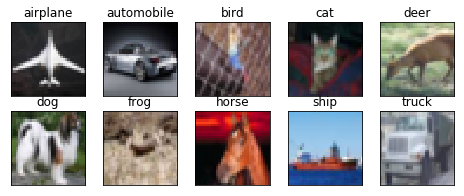

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) 0.013107389 1.0013419
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy
                        

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### This is 6A Model

In [0]:
model_input = Input(shape=(32, 32, 3))

#mlpconv block1
x = Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(model_input)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)

x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

#mlpconv block2
x = Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)

x = MaxPooling2D((2,2))(x)
x = Dropout(0.3)(x)

#mlpconv block3
x = Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)

x = MaxPooling2D((2,2))(x)
x = Dropout(0.5)(x)

x = Conv2D(10, (1, 1), activation='relu')(x)
x = AveragePooling2D(4,4)(x)
x= Flatten()(x)
x = Activation(activation='softmax')(x)

model = Model(model_input, x, name='cnn')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 16, 32)        0         
__________

### Updating the 6A model to include:
### Normal Convolution
### Separable Convolution 
### Depthwise Convolution
### Grouped Convolution (use 3x3, 5x5 only)
### Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 


In [0]:
model_input = Input(shape=(32, 32, 3))

#block1
x1 = Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(model_input)
x1 = BatchNormalization()(x1)
x1 = SeparableConv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x1 = BatchNormalization()(x1)

x1 = MaxPooling2D((2,2))(x1)
x1 = Dropout(0.2)(x1)

#Grouped Conv block (3,3) & (5,5)
x2 = Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x2 = BatchNormalization()(x2)

x3 = Conv2D(64, (5, 5), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x1)
x3 = BatchNormalization()(x3)

x4 = concatenate([x2,x3])

x4 = MaxPooling2D((2,2))(x4)
x4 = Dropout(0.3)(x4)



#Grouped Conv block Conv2d(3,3) dilation rate (1,1) & Conv2d(3,3) with dilation rate (2,2)
x5 = Conv2D(128, (3, 3), dilation_rate=(1, 1), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x4)
x6 = BatchNormalization()(x6)

x7 = concatenate([x5,x6])

x8 = DepthwiseConv2D((3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0001))(x7)
x8 = BatchNormalization()(x8)

x8 = MaxPooling2D((2,2))(x8)
x8 = Dropout(0.5)(x8)

x8 = Conv2D(10, (1, 1), activation='relu')(x8)
x8 = AveragePooling2D(4,4)(x8)
x8= Flatten()(x8)
x8 = Activation(activation='softmax')(x8)

model = Model(model_input, x8, name='cnn')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_118 (Conv2D)             (None, 32, 32, 32)   896         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 32, 32, 32)   128         conv2d_118[0][0]                 
__________________________________________________________________________________________________
separable_conv2d_19 (SeparableC (None, 32, 32, 32)   1344        batch_normalization_92[0][0]     
__________________________________________________________________________________________________
batch_norm

### Total parameters 375,114

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 30s 78ms/step - loss: 1.4008 - acc: 0.5157 - val_loss: 1.3286 - val_acc: 0.5497
Epoch 2/50
390/390 [==============================] - 25s 63ms/step - loss: 1.0060 - acc: 0.6625 - val_loss: 0.8954 - val_acc: 0.7084
Epoch 3/50
390/390 [==============================] - 25s 63ms/step - loss: 0.8584 - acc: 0.7218 - val_loss: 0.7908 - val_acc: 0.7414
Epoch 4/50
390/390 [==============================] - 25s 63ms/step - loss: 0.7722 - acc: 0.7546 - val_loss: 0.8350 - val_acc: 0.7438
Epoch 5/50
390/390 [==============================] - 24s 63ms/step - loss: 0.7169 - acc: 0.7737 - val_loss: 0.7288 - val_acc: 0.7717
Epoch 6/50
390/390 [==============================] - 25s 63ms/step - loss: 0.6704 - acc: 0.7910 - val_loss: 0.7229 - val_acc: 0.7745
Epoch 7/50
390/390 [==============================] - 25s 63ms/step - loss: 0.6414 - acc: 0.8042 - val_loss: 0.7272 - val_acc: 0.7828
Epoch 8/50
390/390 [==============================] - 25s 63ms

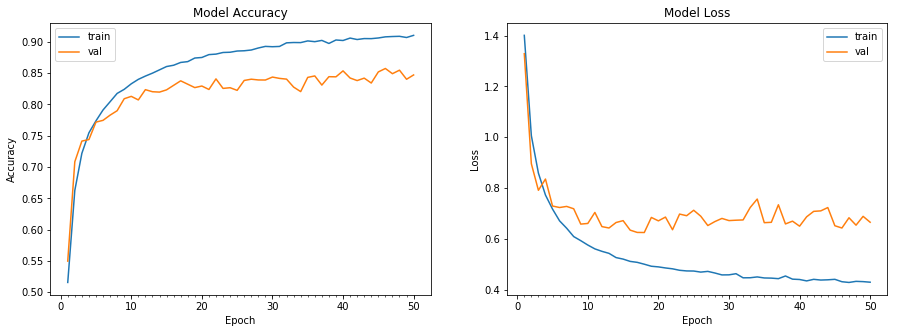

Accuracy on test data is: 84.70


In [63]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (X_test, Y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model))

### Accuracy achieved 85.73 % in 46th Epoch as shown above